In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:/Users/USER/Desktop/S4G/evaluate.csv",encoding='latin-1')

In [2]:
df['score'] = df['Emotion'].factorize()[0]

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,X,text,Emotion,score
0,1,So we thought exposing #SexForGrades was goin...,anger,0
1,2,ASUU when it's time to share government money ...,anger,0
2,3,"RT @OntopDaura1: Condemn #SexForGrades, they w...",anger,0
3,4,"RT @Chommyzy_Kraft: Mompha is in a deep shit, ...",anger,0
4,5,"RT @Iam_ChisomLucky: Dear ASUU, \r\n My second...",anger,0


In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [5]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [6]:
# remove twitter handles (@user)
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [7]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [8]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
df.head()

,X,text,Emotion,score,tidy_tweet
0,1,So we thought exposing #SexForGrades was goin...,anger,0,thought exposing #SexForGrades going engender ...
1,2,ASUU when it's time to share government money ...,anger,0,ASUU when time share government money ASUU whe...
2,3,"RT @OntopDaura1: Condemn #SexForGrades, they w...",anger,0,Condemn #SexForGrades they wont Condemn studen...
3,4,"RT @Chommyzy_Kraft: Mompha is in a deep shit, ...",anger,0,Mompha deep shit please should hire Annalise K...
4,5,"RT @Iam_ChisomLucky: Dear ASUU, \r\n My second...",anger,0,Dear ASUU second semester exams ends Wednesday...


In [10]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [thought, exposing, #SexForGrades, going, enge...
1    [ASUU, when, time, share, government, money, A...
2    [Condemn, #SexForGrades, they, wont, Condemn, ...
3    [Mompha, deep, shit, please, should, hire, Ann...
4    [Dear, ASUU, second, semester, exams, ends, We...
Name: tidy_tweet, dtype: object

In [11]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [thought, expos, #sexforgrad, go, engend, figh...
1    [asuu, when, time, share, govern, money, asuu,...
2    [condemn, #sexforgrad, they, wont, condemn, st...
3    [mompha, deep, shit, pleas, should, hire, anna...
4    [dear, asuu, second, semest, exam, end, wednes...
Name: tidy_tweet, dtype: object

In [12]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

In [13]:
!pip install wordcloud

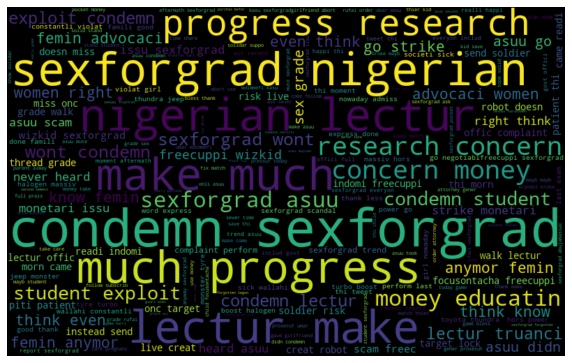

In [14]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
ANC_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

KeyError: 'party'

In [ ]:
EFF_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
DA_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from EFF racist/sexist tweets

HT_EFF = hashtag_extract(df['tidy_tweet'][df['party'] == 0])

# extracting hashtags from ANC tweets
HT_ANC = hashtag_extract(df['tidy_tweet'][df['party'] == 1])

# extracting hashtags from ANC tweets
HT_DA = hashtag_extract(df['tidy_tweet'][df['party'] == 2])

# unnesting list
HT_EFF = sum(HT_EFF,[])
HT_ANC = sum(HT_ANC,[])
HT_DA = sum(HT_DA,[])


In [ ]:
a = nltk.FreqDist(HT_EFF)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
a = nltk.FreqDist(HT_ANC)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
a = nltk.FreqDist(HT_DA)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [16]:
party_id_df = df[['Emotion','score']].drop_duplicates().sort_values('Emotion')

In [17]:
party_id_df

,Emotion,score
1691,Anticipation,1
0,anger,0
4250,fear,2
8881,joy,5
7860,sad,4
5492,trust,3


In [18]:
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['score', 'Emotion']].values)

In [19]:
id_to_category

{1: 'Anticipation', 0: 'anger', 2: 'fear', 5: 'joy', 4: 'sad', 3: 'trust'}

In [20]:
# Pick 5 random samples from the dataframe
df.sample(5, random_state=0)

,X,text,Emotion,score,tidy_tweet
1297,1298,RT @RolandHarry001: I have never heard of ASUU...,anger,0,have never heard asuu go strike monetari issu ...
5547,56,RT @AbiyeBelema: A thread for sex for grade:\r...,trust,3,thread grade walk into lectur offic complaint ...
8497,638,RT @JustDerby: Im really happy to see this tw...,sad,4,realli happi thi tweet thi moment aftermath #s...
2930,1240,@Aluko__ @BisolaSanusi Any experience or perso...,Anticipation,1,experi person stori share #sexforgrad
10036,1156,RT @AbiyeBelema: A thread for sex for grade:\r...,joy,5,thread grade walk into lectur offic complaint ...


In [21]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
party_df = df[['Emotion', 'score']].drop_duplicates().sort_values('Emotion')

In [22]:
party_df

,Emotion,score
1691,Anticipation,1
0,anger,0
4250,fear,2
8881,joy,5
7860,sad,4
5492,trust,3


In [23]:
# Group the dataframe by categories and count items ( number of news articles) in each category
df.groupby('Emotion').score.count()

Emotion
Anticipation    2559
anger           1691
fear            1242
joy             1546
sad             1021
trust           2368
Name: score, dtype: int64

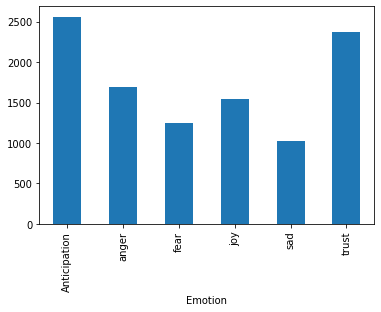

In [24]:
#Plot the distribution of news articles by category
df.groupby('Emotion').score.count().plot.bar(ylim=0)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.tidy_tweet).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.score

In [26]:
features.shape

(10427, 3680)

In [27]:
# Remember the dictionary created to map category names to a number ? 
category_to_id.items()

dict_items([('Anticipation', 1), ('anger', 0), ('fear', 2), ('joy', 5), ('sad', 4), ('trust', 3)])

In [28]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('Anticipation', 1),
 ('anger', 0),
 ('fear', 2),
 ('joy', 5),
 ('sad', 4),
 ('trust', 3)]

In [29]:
# Use chi-square analysis to find corellation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Target, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == party)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Target))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'Anticipation':
  . Most correlated unigrams:
       . bolanl
       . stress
  . Most correlated bigrams:
       . lectur just
       . just time
# 'anger':
  . Most correlated unigrams:
       . semest
       . condemn
  . Most correlated bigrams:
       . asuu second
       . end wednesday
# 'fear':
  . Most correlated unigrams:
       . robot
       . instead
  . Most correlated bigrams:
       . target lock
       . sexforgrad sexforgrad
# 'joy':
  . Most correlated unigrams:
       . adeboy
       . prayer
  . Most correlated bigrams:
       . lectur student
       . special prayer
# 'sad':
  . Most correlated unigrams:
       . indomi
       . patient
  . Most correlated bigrams:
       . piti patient
       . sexforgrad sexforgrad
# 'trust':
  . Most correlated unigrams:
       . solidar
       . didn
  . Most correlated bigrams:
       . didn condemn
       . asuu didn


In [30]:
features_chi2

(array([0.27191483, 0.02949167, 0.63913683, ..., 0.00518301, 0.00518301,
        0.63540053]),
 array([0.60205017, 0.86364871, 0.42402354, ..., 0.9426074 , 0.9426074 ,
        0.42538126]))

In [31]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [32]:
type(projected_features)

numpy.ndarray

In [33]:
my_id = 0 # Select a category_id
projected_features[(labels[indices] == my_id).values]

array([[ 2.75943470e+01, -8.69199097e-01],
       [-3.41945953e+01,  3.30725327e+01],
       [-1.17342262e+01,  2.44236684e+00],
       [-3.39062614e+01,  3.38085098e+01],
       [-2.60008659e+01, -1.33252544e+01],
       [ 2.91470833e+01, -5.83317995e-01],
       [ 2.88913345e+01, -9.00636762e-02],
       [ 5.54524918e+01, -6.57955408e+00],
       [-3.44179459e+01,  2.98521423e+01],
       [ 4.68878126e+00,  5.35025826e+01],
       [ 1.05659556e+00, -6.30883455e+00],
       [-5.87539864e+00, -2.16675282e+01],
       [ 2.72672787e+01,  1.66869640e-01],
       [ 1.08653927e+01,  5.11216545e+01],
       [ 3.05693626e+01,  3.19424229e+01],
       [ 2.74743958e+01,  4.33479130e-01],
       [ 2.08304062e+01,  8.08093834e+00],
       [ 8.68528557e+00,  1.51210022e+01],
       [-3.19304981e+01,  3.22061768e+01],
       [ 2.73452854e+01,  1.28950386e+01],
       [ 1.92481308e+01, -5.94874620e-01],
       [ 5.54459190e+00,  5.17777901e+01],
       [-3.53092346e+01,  3.82305069e+01],
       [ 5.

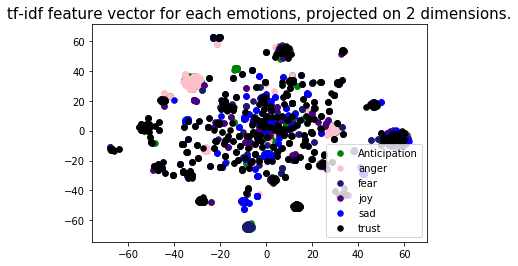

In [34]:
colors = ['pink', 'green','midnightblue', 'black', 'blue', 'indigo']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each emotions, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import cross_val_score


models = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    XGBClassifier(random_state=0,learning_rate=0.01),
    svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'),
    LogisticRegression(random_state=0),
]

In [36]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [ ]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [ ]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [ ]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

In [ ]:
cv_df

In [ ]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average = 'micro')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'micro')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.Emotion.values, yticklabels=party_id_df.Emotion.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
from IPython.display import display

for predicted in party_df.score:
 for actual in party_df.score:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['text'])
      print('')

In [ ]:
model.fit(features, labels)

In [ ]:
# model.coef_ contains the importance of each feature for each category
model.coef_

In [ ]:
texts = ["It is disheatening to hear this happening in our schools","sex for grades perpetrators should be sentence to death","I was shocked to see the news this morning, please end sex for grades" ]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")